In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [2]:
from torch.utils.data import DataLoader, Dataset

In [3]:
class OHLC(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
    
    def __getitem__(self,index):
        r = self.data.iloc[index]
        label = torch.tensor(r.is_up_day, dtype=torch.long)
        sample = self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
        return sample, label

    def __len__(self):
        return len(self.data) 

In [4]:
train_set = torchvision.datasets.FashionMNIST(
    root='../data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=10)

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [6]:
len(train_set)

60000

In [7]:
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [9]:
sample = next(iter(train_set))

In [10]:
len(sample)

2

In [11]:
type(sample)

tuple

In [12]:
image, label = sample

In [13]:
image.shape 

torch.Size([1, 28, 28])

In [14]:
label

9

label: 9


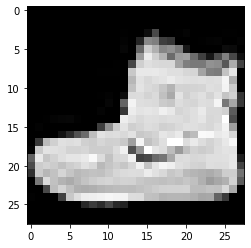

In [15]:
plt.imshow(image.squeeze(),cmap='gray')
print('label:',label)

In [16]:
batch = next(iter(train_loader))

In [17]:
len(batch)

2

In [18]:
type(batch)

list

In [19]:
images, labels = batch

In [20]:
images.shape

torch.Size([10, 1, 28, 28])

In [21]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


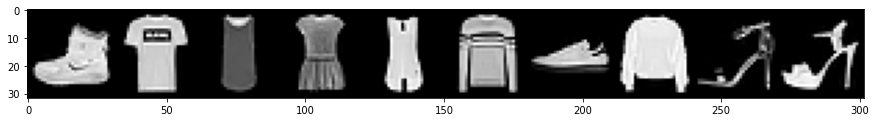

In [22]:
grid = torchvision.utils.make_grid(images,nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

print("labels:",labels)

## CNN model building

In [ ]:
class Lizard:
    def __init__(self,name):
        self.name = name 
    def 